# 차원 축소

![PCA-LDA](https://d.pr/i/hI0WaD+)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PCA (Principal Component Analysis)
- 데이터를 가장 잘 설명할 수 있는, 분산을 최대화하는 방향으로 축을 결정

In [3]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


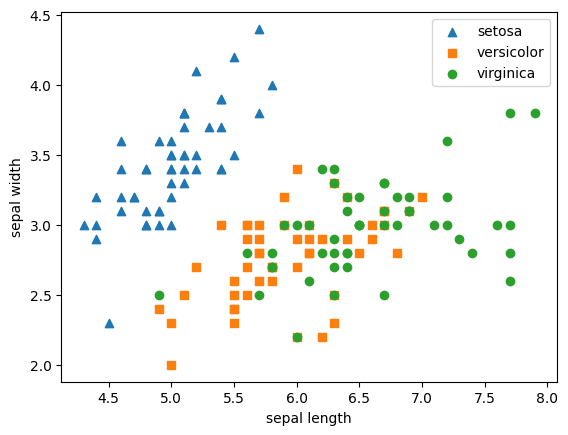

In [4]:
# 특성 2개만 뽑아서 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [5]:
# PCA 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 2차원으로 축소

X = iris_df.iloc[:, :-1]    # 독립변수(특성 데이터)만 모아서 X

pca.fit(X)
iris_pca = pca.transform(X)

iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2'])
iris_pca_df['target'] = iris_data.target


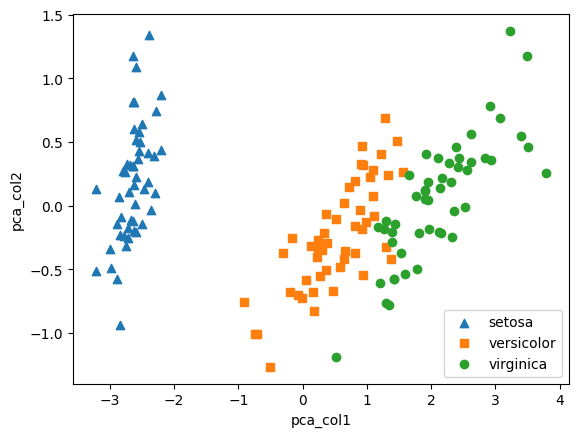

In [6]:
# 축소한 차원으로 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_df['target'] == i]['pca_col1']
    y = iris_pca_df[iris_df['target'] == i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

In [7]:
# PCA를 통해 생성된 주성분들이 실제 데이터의 총 분산에 얼마만큼의 비율을 나타내는지
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [8]:
# 원본 데이터 학습 및 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5)
print("원본 데이터 평가:", np.mean(scores))

원본 데이터 평가: 0.9733333333333334


In [9]:
# PCA 데이터 학습 및 평가
lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_pca_df[['pca_col1', 'pca_col2']], iris_pca_df['target'], cv=5)
print("PCA 데이터 평가:", np.mean(scores))

PCA 데이터 평가: 0.96


##### PCA 과일 데이터
- 흑백 이미지 데이터 픽셀값 0(흑)~255(백)

In [10]:
fruits = np.load('./data/fruits_300.npy')
fruits.shape    # (300, 100, 100) = 300개의 이미지 * 100행 * 100열

(300, 100, 100)

In [11]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N / 10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(
        rows, cols, 
        figsize=(cols * ratio, rows * ratio),
        squeeze=False
        )
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N:
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            ax[i, j].axis('off')

    plt.show()

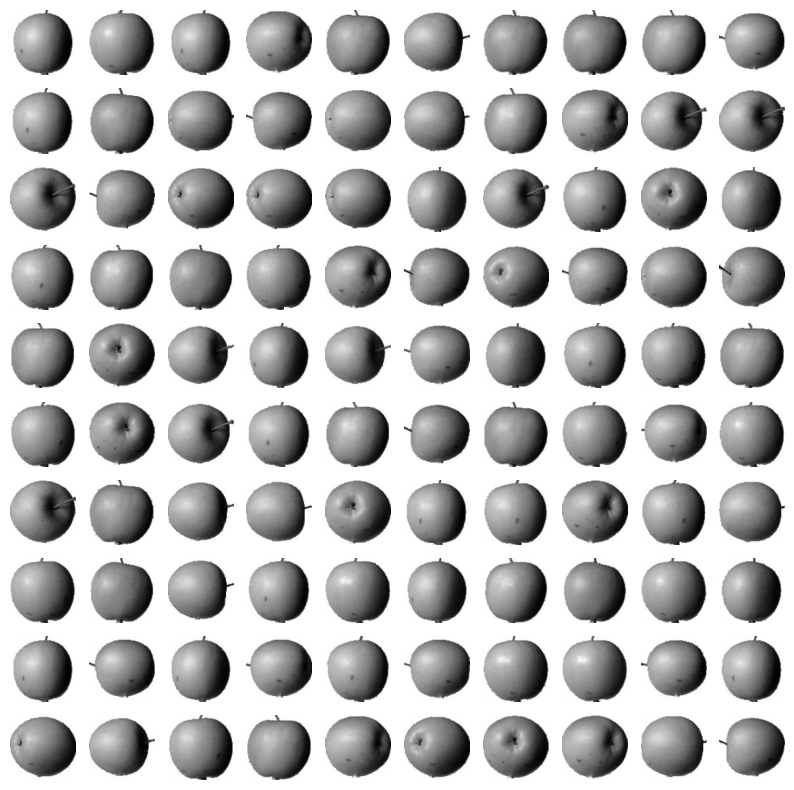

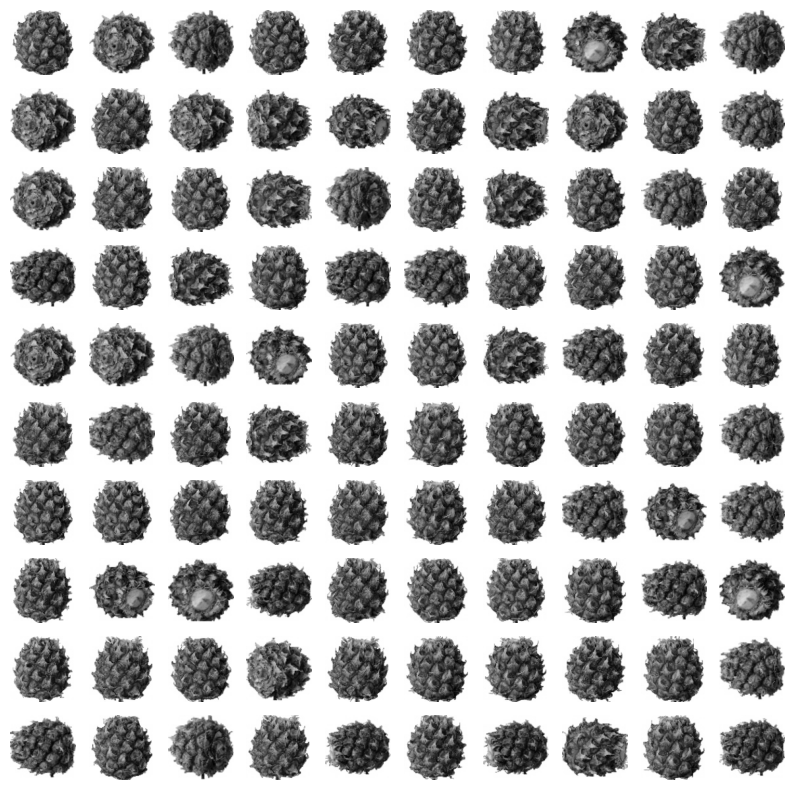

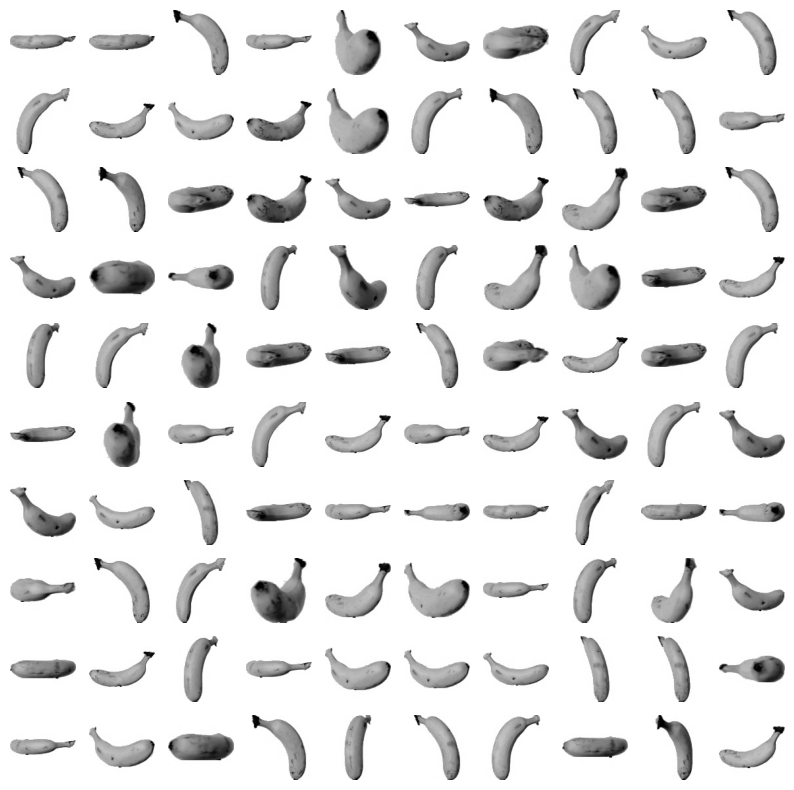

In [12]:
draw_fruits(fruits[:100])
draw_fruits(fruits[100:200])
draw_fruits(fruits[200:])

In [13]:
# 1차원으로 펼치기
fruits_1d = fruits.reshape(300, 100 * 100)
fruits_1d.shape

(300, 10000)

In [14]:
pca = PCA(n_components=50)
pca.fit(fruits_1d)

PCA(n_components=50)

In [15]:
pca.components_.shape   # (50, 10000) = (PCA로 구현한 주성분 개수, 원본 데이터 특성 개수)

(50, 10000)

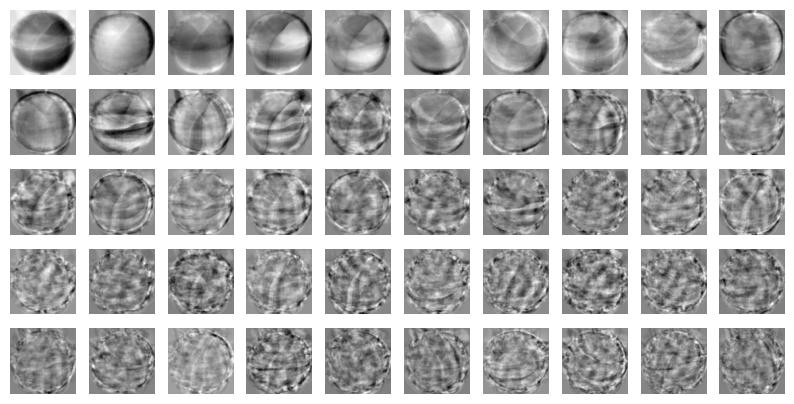

In [16]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [17]:
fruits_pca = pca.transform(fruits_1d)
fruits_pca.shape

(300, 50)

In [18]:
# PCA 데이터 저장
np.save('./data/fruits_pca.npy', fruits_pca)

In [19]:
# 저장한 PCA 데이터 로드
fruits_pca = np.load('./data/fruits_pca.npy')

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.005112
 0.00486383 0.00480347 0.00447835 0.00437317 0.00408031 0.00389479
 0.00372446 0.00359287 0.00331456 0.00317837 0.00304324 0.00303754
 0.00288876 0.00275889 0.0026498  0.00255816 0.00252083 0.0024706
 0.00239618 0.0023093  0.00221932 0.00216503 0.00213598 0.00196339
 0.00192489 0.00189896 0.00184797 0.00182608 0.00173859 0.00167685
 0.00163068 0.00160581]
0.921563962726096


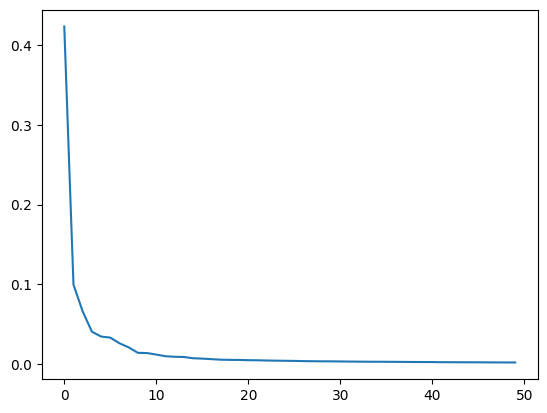

In [20]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [21]:
# 라벨 데이터
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [22]:
# 원본 데이터 교차검증 점수 확인

# cross_val_score : 각 cv의 점수 반환 
# cross_validate : 각 cv의 학습시간, 테스트시간, cv의 점수 반환 (평가지표 여러 개 사용 가능)
from sklearn.model_selection import cross_validate

lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, fruits_1d, target, cv=3)
result

{'fit_time': array([0.25996375, 0.18194914, 0.16232395]),
 'score_time': array([0.00566101, 0.00560594, 0.00292897]),
 'test_score': array([1.  , 1.  , 0.99])}

In [23]:
# PCA 데이터 교차검증 점수 확인
result_pca = cross_validate(lr_clf, fruits_pca, target, cv=3)
result_pca

{'fit_time': array([0.00587082, 0.00388408, 0.0038631 ]),
 'score_time': array([0.00096416, 0.00028896, 0.000278  ]),
 'test_score': array([1.  , 1.  , 0.99])}

In [24]:
# 원본 데이터 복구
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

In [25]:
# 복구 이미지 시각화
(fruits_inverse.reshape(-1, 100, 100))

array([[[1.06069856, 1.05183412, 1.06965992, ..., 1.01415379,
         0.99985181, 0.99925906],
        [1.03609027, 1.04511893, 1.0089662 , ..., 1.        ,
         1.00476733, 1.        ],
        [1.02137873, 1.00268988, 0.98876726, ..., 1.        ,
         1.00909008, 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.029996  , 0.99928216, 1.03080716, ..., 1.0063773 ,
         1.00231965, 1.01159823],
        [1.03670623, 0.97988507, 1.01765131, ..., 1.        ,
         1.00135255, 1.        ],
        [1.00510546, 1.011287  , 1.00509307, ..., 1.        ,
         1.00966404, 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1. 

### LDA (Linear Discriminant Analysis)
- 타겟 클래스 간 분리를 최대로 하는 축으로 결정

In [26]:
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data.data)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [27]:
# LDA 변환
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(iris_scaled, iris_data.target)

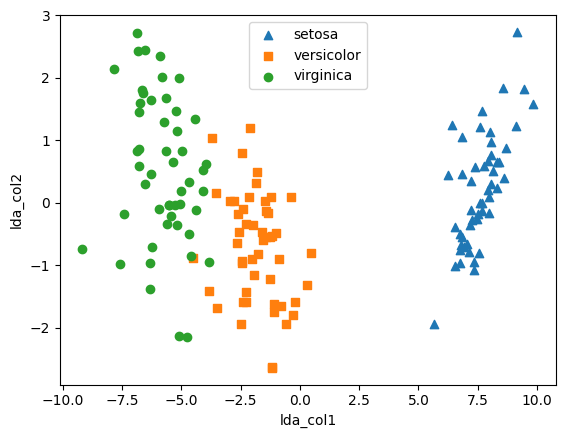

In [28]:
# LDA로 축소한 데이터 시각화

iris_lda_df = pd.DataFrame(iris_lda, columns=['lda_col1', 'lda_col2'])
iris_lda_df['target'] = iris_data.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_lda_df[iris_lda_df['target'] == i]['lda_col1']
    y = iris_lda_df[iris_lda_df['target'] == i]['lda_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lda_col1')
plt.ylabel('lda_col2')
plt.show()

### LLE (Locally Linear Embedding)
- 데이터 포인트를 근접한 이웃과 선형 결합으로 표현하고 이를 유지하도록 저차원 공간에 매핑

In [29]:
from sklearn.manifold import LocallyLinearEmbedding

iris_data = load_iris()

# LLE 변환
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
iris_lle = lle.fit_transform(iris_data.data)

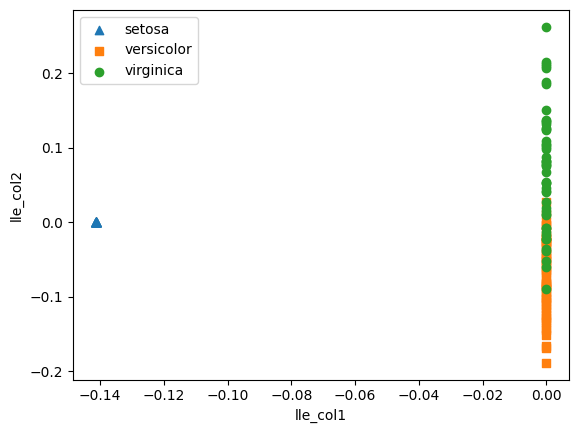

In [30]:
iris_lle_df = pd.DataFrame(iris_lle, columns=['lle_col1', 'lle_col2'])
iris_lle_df['target'] = iris_data.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_lle_df[iris_lle_df['target'] == i]['lle_col1']
    y = iris_lle_df[iris_lle_df['target'] == i]['lle_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])

plt.legend()
plt.xlabel('lle_col1')
plt.ylabel('lle_col2')
plt.show()

In [31]:
# LLE 변환 데이터 교차 검증 확인
result = cross_validate(
    lr_clf, 
    iris_lle_df[['lle_col1', 'lle_col2']], 
    iris_lle_df['target'], 
    cv=3)
result

{'fit_time': array([0.00281191, 0.00378394, 0.00312996]),
 'score_time': array([0.00090814, 0.001688  , 0.00217009]),
 'test_score': array([0.92, 0.92, 0.9 ])}

In [32]:
print(lle.n_neighbors)  # 이웃 수
print(lle.n_components) # 축소된 차원수
print(lle.reconstruction_error_)    # 재구성 오차

10
2
2.7091683885929365e-07
